In [1]:
import pandas as pd
import numpy as np

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24
%matplotlib inline

In [12]:
import matplotlib
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn import preprocessing

from sklearn.ensemble import VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
col_names = ['Sort','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [9]:
data = pd.read_csv('vine.txt',header=None,names=col_names)

In [10]:
data.head()

,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
X = data[ col_names[1:]].values
X = preprocessing.scale(X,axis=0)

In [17]:
y = data[ col_names[0] ].values

In [19]:
metric_names = ['euclidean','chebyshev','manhattan']  #евклид, максм модулей, сумма модулей

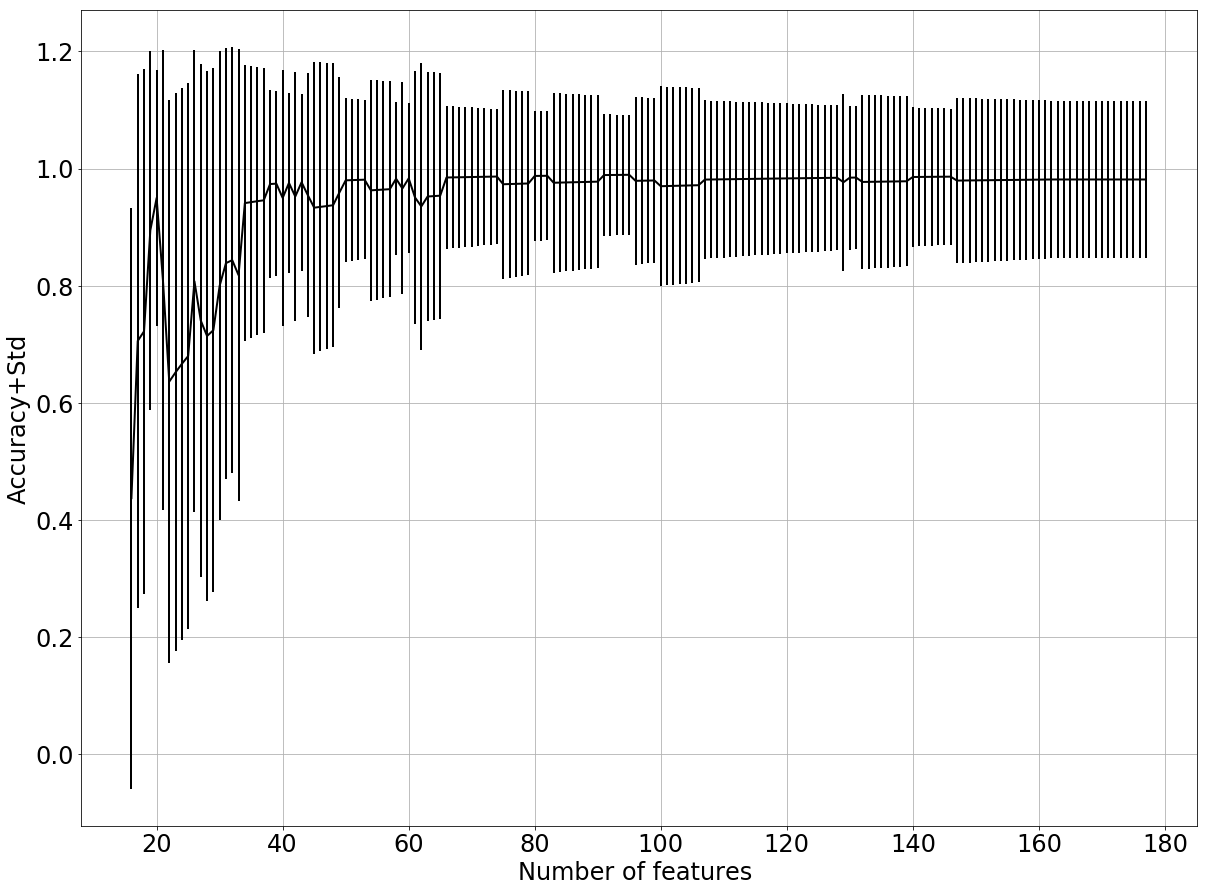

In [34]:
acc_list = []
std_list = []
best_n_neighbors = 16

random_order = list(range(16,X.shape[0]))
np.random.shuffle(random_order)

for i in range(best_n_neighbors,X.shape[0]) :
    X_subset = X[random_order[:i]]
    y_subset = y[random_order[:i]]
    
    clf = VotingClassifier(estimators=[('knn_' + metric_name,
                                    KNeighborsClassifier(n_neighbors=15,
                                                         metric=metric_name,
                                                         weights='uniform'))
                                    for metric_name in metric_names],
                       voting='soft')
    
    clf.fit(X_subset,y_subset)
    y_head_subset = clf.predict(X_subset)
    
    std = np.std(y_head_subset == y_subset)
    acc = np.mean(y_head_subset == y_subset)   
    
    std_list.append(std)
    acc_list.append(acc)
    
    
plt.figure(figsize=(20,15))
plt.grid(True)

plt.errorbar(list(range(best_n_neighbors,X.shape[0])),acc_list, yerr=std_list, color = 'black', markerfacecolor = 'brown') 
plt.xlabel('Number of features ')
plt.ylabel('Accuracy+Std')

plt.savefig(fname='Error_withSTD.png',format='png')
plt.show()
